## ***Use Case 2: Audience Sentiment Analysis***

**Objective:**

To analyze audience reviews of movies and predict whether the overall sentiment is positive or negative using text mining and NLP techniques.

***Step 1 – Import Libraries and Load Dataset***

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Text_SM_Web_analytics Capstone\Data\IMDB Dataset.csv")

# Display first few records
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


***Step 2 – Text Preprocessing (Cleaning Reviews)***

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def clean_text_fast(text):
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    return text.lower()



In [22]:
clean_text(df['review'].iloc[0])


'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [30]:
df['review_clean'] = df['review'].apply(clean_text_fast)
df.head()


,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming t...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is...


***Step 3 – Encode Labels & Split Data***

In [32]:
# Convert sentiment labels to binary values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset
X = df['review_clean']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 40000
Testing samples: 10000


***Step 4 – Text Vectorization (TF-IDF)***

In [34]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF matrix shape:", X_train_tfidf.shape)


TF-IDF matrix shape: (40000, 10000)


***Step 5 – Model Training (Logistic Regression)***

In [37]:
# Train the logistic regression classifier
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print("🎯 Model Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 0.8914

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Model Accuracy: 89.14%**

The logistic regression model achieves 89% accuracy, indicating strong performance in predicting whether a movie review is positive or negative.
Precision, recall, and F1 scores for both classes (0 = negative, 1 = positive) are close to each other, showing a balanced model without major class bias.

**Class-wise Insights:**

Negative Reviews (0)

Precision = 0.90 → Model is very accurate when predicting a negative review

Recall = 0.87 → It captures most negative reviews, but misses some

F1-score = 0.89

Positive Reviews (1)

Precision = 0.88 → Slightly lower but still high

Recall = 0.91 → Excellent ability to correctly identify positive reviews

F1-score = 0.89

**Takeaway:**

The model is slightly better at identifying positive reviews than negative ones.
Overall, this is a high-performing sentiment model suitable for audience opinion analysis.

***Step 6 – Visualization of Results***

**6.1 Confusion Matrix**

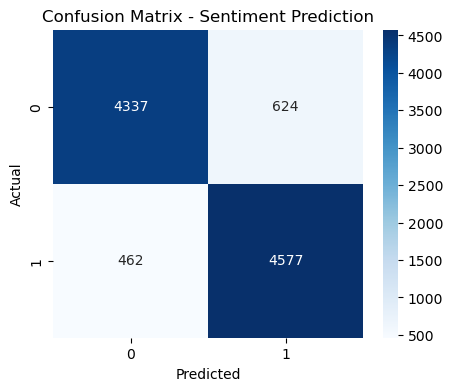

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Sentiment Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Key Observations:**

The model correctly classified:

4337 negative reviews

4577 positive reviews

Misclassifications:

624 negative reviews misclassified as positive

462 positive reviews misclassified as negative

**Interpretation:**

The model is slightly more confident in predicting positive sentiment, as it misclassifies fewer positive reviews. Negative reviews tend to be a bit harder to detect — which is common in sentiment datasets because negatives often contain sarcasm or mixed tone.

**6.2 Most Important Words (TF-IDF Features)**

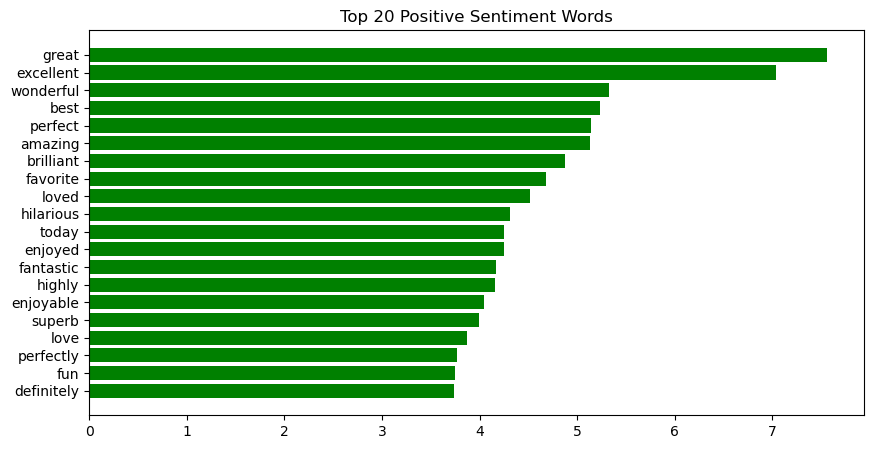

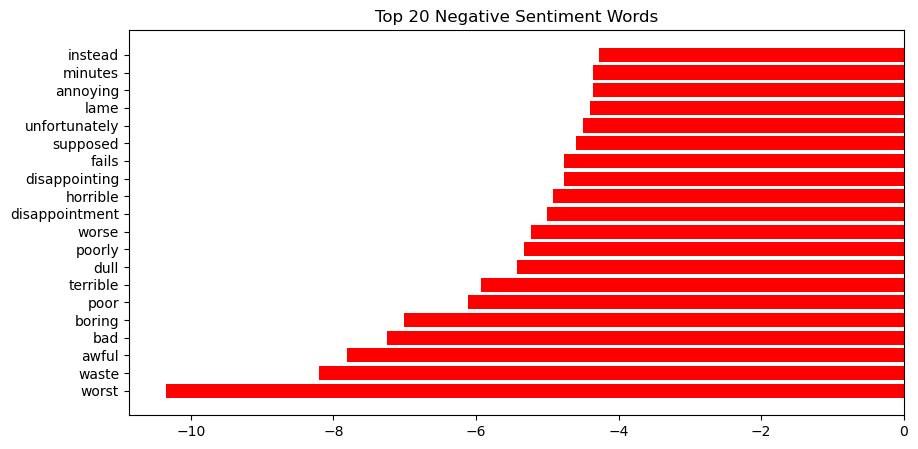

In [44]:
# Get top positive and negative words
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_pos = np.argsort(coefs)[-20:]
top_neg = np.argsort(coefs)[:20]

plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_pos], coefs[top_pos], color='green')
plt.title("Top 20 Positive Sentiment Words")
plt.show()

plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_neg], coefs[top_neg], color='red')
plt.title("Top 20 Negative Sentiment Words")
plt.show()


**Positive Sentiment Words**

Examples: great, excellent, wonderful, amazing, perfect, superb, enjoyable, hilarious, loved, fantastic

**Insight:**

Positive reviews frequently contain adjectives describing quality, enjoyment, and emotional satisfaction.
Words like great, excellent, wonderful indicate strong approval, while fun, enjoyed, hilarious reflect entertainment value — core components of movie sentiment.

**Negative Sentiment Words**

Examples: worst, awful, waste, boring, terrible, poor, disappointing, horrible, dull

**Insight:**

Negative reviews use strong criticism-related terms.
Words like worst, awful, bad, boring highlight dissatisfaction, while disappointing, horrible show emotional negativity.
These words reflect viewer frustration with movie quality, acting, or storyline.

**The sentiment analysis model effectively distinguishes between positive and negative audience reviews with nearly 90% accuracy.
TF-IDF reveals that highly emotional words drive sentiment classification — with strong praise and harsh criticism forming clear patterns.
This analysis helps studios quickly understand audience reactions, identify trending sentiments, and evaluate movie or show performance based on viewer feedback.**